In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC


In [3]:
# Dataset: https://www.kaggle.com/edqian/twitter-climate-change-sentiment-dataset

In [4]:
#This notebook is just for my quick interest in multiclass classification of sentiments on climate change
# I know, the accuracy can be improved via preprocessing or stronger models 

Dataset: https://www.kaggle.com/edqian/twitter-climate-change-sentiment-dataset

This notebook is just for my quick interest in multiclass classification of sentiments on climate change
The accuracy can be improved via preprocessing or stronger models 

As I wanted to get an overview of the accuracy 

length of dataset: 43943
missing values: 0


In [5]:
dataset = pd.read_csv("../input/twitter-climate-change-sentiment-dataset/twitter_sentiment_data.csv")

In [6]:
# 1. Open the CSV file in reading mode and the TXT file in writing mode
with open('my_file.txt', 'a') as f_out:
    # 3. Write the content into the TXT file
    f_out.write(str(dataset['message']))

In [7]:
dataset.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [31]:
dataset = pd.read_csv("../input/climate-sentiment-in-twitter/Climate_twitter.csv")
dataset.head()

,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity
0,2184934963,2020-12-22 23:22:20,71,Twitter Web App,GO GREEN,91,The death of summer Arctic ice our Earth coole...,ECOWARRIORSS,NaN,False,23415,20439,-0.054365,0.426984
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,Elsevier and the EditorsinChief are pleased to...,ElsevierEnergy,"Oxford, England",False,6615,508,0.387500,0.633333
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,False,22,133,0.261905,0.345238
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH cli...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000


In [32]:
# 1. Open the CSV file in reading mode and the TXT file in writing mode
with open('my_file.txt', 'w') as f_out:
    # 3. Write the content into the TXT file
    f_out.write(str(dataset['text']))

In [42]:
with open('my_file.txt', 'r') as f:
    print(f.readlines())

['0      The death of summer Arctic ice our Earth coole...\n', '1      Elsevier and the EditorsinChief are pleased to...\n', '2      From better climate change education to improv...\n', '3      climate change Links to FIXING CLIMATE CHANGE ...\n', '4      climate change The 11TH HOUR FOR THE EARTH cli...\n', '                             ...                        \n', '391    An Inconsistent Truth From global cooling 1970...\n', '392    2 climate thought alongside Einstein Robert Op...\n', '393    3 climate used as supporting evidence that man...\n', '394    Global warming Global government via YouTube c...\n', '395    Its feared that climate change will make hot c...\n', 'Name: text, Length: 396, dtype: object0        @tiniebeany climate change is an interesting h...\n', '1        RT @NatGeoChannel: Watch #BeforeTheFlood right...\n', "2        Fabulous! Leonardo #DiCaprio's film on #climat...\n", '3        RT @Mick_Fanning: Just watched this amazing do...\n', '4        RT @cnalive: 

In [23]:
!pip install wordcloud

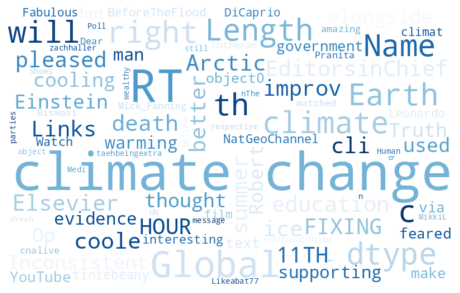

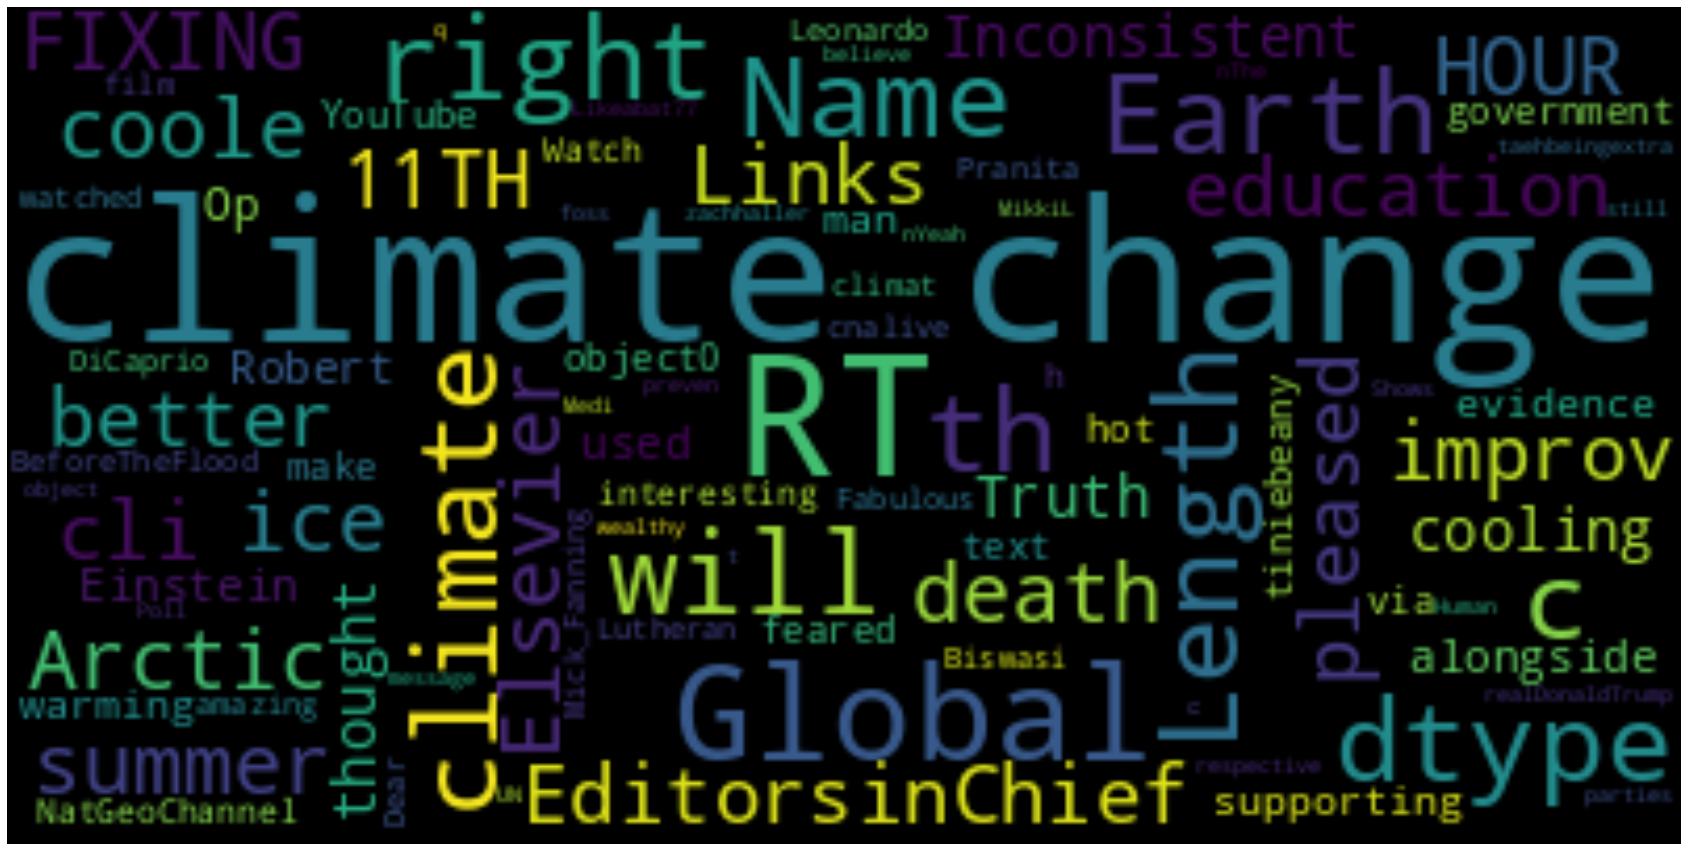

In [46]:
#!/usr/bin/env python
"""
Minimal Example
===============
Generating a square wordcloud from the US constitution using default arguments.
"""

import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'my_file.txt')).read()

# Generate a word cloud image
# Create wordcolud for the pro climate change class
wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(text)
# wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=80).generate(text)
plt.figure(figsize=(30,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

In [8]:
#missing values
len(dataset[dataset.message == None])

0

In [9]:
#length of whole dataset
len(dataset)

43943

In [10]:
#I am using 70% of the data for training
train_data_length = int(len(dataset) * 0.7)
print("Train data length: "+str(train_data_length))
print("Test data length: "+str(len(dataset)-train_data_length))

#defining training and test set
train_data = dataset.iloc[:train_data_length]
test_data = dataset.iloc[train_data_length:]

Train data length: 30760
Test data length: 13183


<AxesSubplot:>

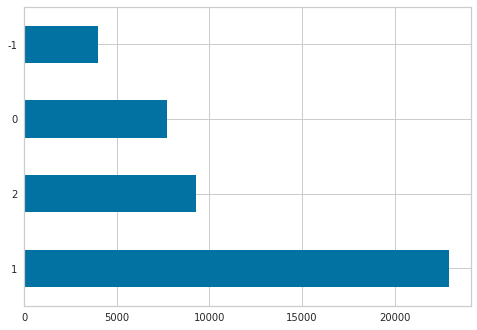

In [14]:
dataset['sentiment'].value_counts().plot(kind='barh')

In [10]:
#Initializing Vectorization of Climate posts
vectorizer = TfidfVectorizer()
vectorised_train_documents = vectorizer.fit_transform(train_data["message"])
vectorised_test_documents = vectorizer.transform(test_data["message"])
vectorised_train_documents

<30760x53046 sparse matrix of type '<class 'numpy.float64'>'
	with 541863 stored elements in Compressed Sparse Row format>

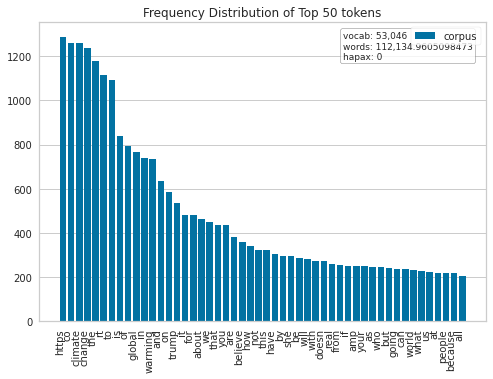

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [11]:
#Distribution of most common words
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(vectorised_train_documents)
visualizer.show()

In [12]:
#Using the One vs All concept, I am changing the labels to vectors (4 x 1) each
mlb = MultiLabelBinarizer()
train_labels = mlb.fit_transform(map(str,train_data.sentiment))
test_labels = mlb.transform(map(str,test_data.sentiment))

In [13]:
ModelsPerformance = {}
#Creating method for model evaluation
def metricsReport(modelName, test_labels, predictions):
    macro_f1 = f1_score(test_labels, predictions, average='macro')

    micro_f1 = f1_score(test_labels, predictions, average='micro')
    
    hamLoss = hamming_loss(test_labels, predictions)
    ModelsPerformance[modelName] = micro_f1

In [14]:
#first weak classifier 
bagClassifier = OneVsRestClassifier(BaggingClassifier(n_jobs=-1))
bagClassifier.fit(vectorised_train_documents, train_labels)
bagPreds = bagClassifier.predict(vectorised_test_documents)
metricsReport(bagClassifier, test_labels, bagPreds)

In [15]:
#Model: K-nearest-Neighbors 
knnClf = KNeighborsClassifier()

knnClf.fit(vectorised_train_documents, train_labels)
knnPredictions = knnClf.predict(vectorised_test_documents)
metricsReport(knnClf, test_labels, knnPredictions)

In [16]:
#Model: Decision Tree
dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(vectorised_train_documents, train_labels)
dtPreds = dtClassifier.predict(vectorised_test_documents)
metricsReport(dtClassifier, test_labels, dtPreds)

In [17]:
#Model: Random Forest
rfClassifier = RandomForestClassifier(n_jobs=-1)
rfClassifier.fit(vectorised_train_documents, train_labels)
rfPreds = rfClassifier.predict(vectorised_test_documents)
metricsReport(rfClassifier, test_labels, rfPreds)

In [18]:
#Model: Gradient Boosting
boostClassifier = OneVsRestClassifier(GradientBoostingClassifier())
boostClassifier.fit(vectorised_train_documents, train_labels)
boostPreds = boostClassifier.predict(vectorised_test_documents)
metricsReport(boostClassifier, test_labels, boostPreds)

In [19]:
#Model: Multinominal Naive Bayes
nbClassifier = OneVsRestClassifier(MultinomialNB())
nbClassifier.fit(vectorised_train_documents, train_labels)
nbPreds = nbClassifier.predict(vectorised_test_documents)
metricsReport(nbClassifier, test_labels, nbPreds)

In [20]:
#Model: Linear Support Vector Machine
svmClassifier = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svmClassifier.fit(vectorised_train_documents, train_labels)

svmPreds = svmClassifier.predict(vectorised_test_documents)
metricsReport(svmClassifier, test_labels, svmPreds)

In [21]:
#Model performance
ModelsPerformance

{OneVsRestClassifier(estimator=BaggingClassifier(n_jobs=-1)): 0.5679097605893185,
 KNeighborsClassifier(): 0.5894666765293292,
 DecisionTreeClassifier(): 0.5231250000000001,
 RandomForestClassifier(n_jobs=-1): 0.6134098576802264,
 OneVsRestClassifier(estimator=GradientBoostingClassifier()): 0.584492885017147,
 OneVsRestClassifier(estimator=MultinomialNB()): 0.5843544530783024,
 OneVsRestClassifier(estimator=LinearSVC(), n_jobs=-1): 0.667963403213025}

In [22]:
#As we can see, the Linear Support Vector Machine performs the best.

In [ ]:
#These results can be highly improved via Preprocessing, Tokening and stronger models